### Создаем выборку

In [6]:
import numpy as np 

h = 0.05
k = 500
k_list = [i for i in range(k+1)]

nd = np.random.standard_normal(k+1)
x_orig = np.array([np.sqrt(i*h) for i in range(k+1)])

x = x_orig + nd
print(x[:10])

[-1.8027152   2.19467114  0.15471869  1.98053396 -1.16743353  1.09176358
 -0.31043865  0.42236398  1.17609842  0.62146044]


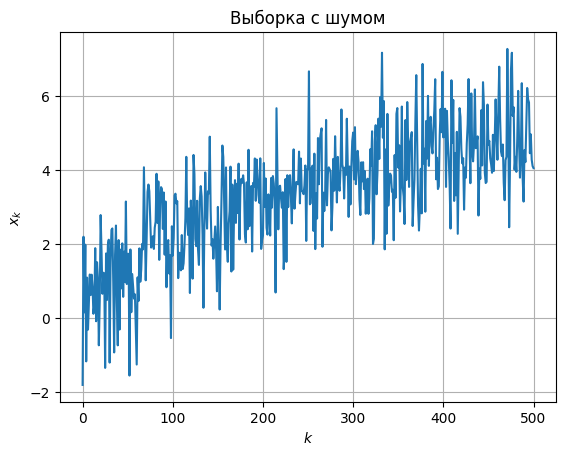

In [11]:
import matplotlib.pyplot as plt

plt.plot(k_list, x)
plt.grid()
plt.xlabel("$k$")
plt.ylabel("$x_k$")
plt.title("Выборка с шумом")
plt.show()

### Простое скользящее среднее

3


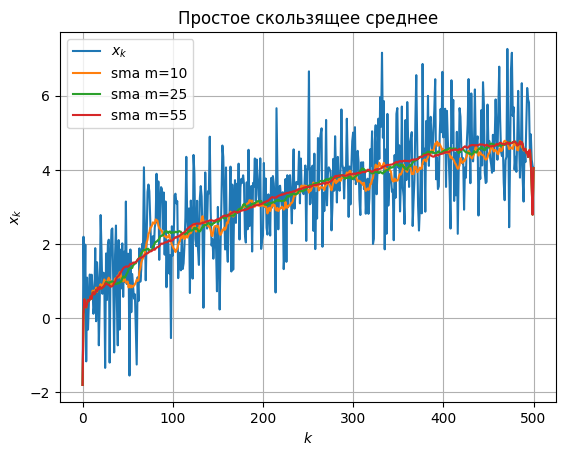

In [16]:
def sma_pd(data, window_size):
    import pandas as pd
    pd_data = pd.Series(data)
    return pd_data.rolling(window=window_size).mean()
    # return np.convolve(data, np.ones(window_size), 'valid') / window_size

def sma(data, m):
    sma = [0] * len(data)
    sma[0] = data[0]
    for i in range(1, k):
        w = m
        while (i - w < 0) or (i + w > len(data) - 1):
            w -= 1
        sma[i] = sum(data[i-w:i+w]) / (2*w+1)
    sma[-1] = data[-1]
    return sma

sma_list = []
for m in [10, 25, 55]:
    sma_list.append(np.array(sma(x, m)))

print(len(sma_list))

# for i in range(3):
#     print((sma_list[i][:10]))



plt.plot(k_list, x, label='$x_k$')
for i, m in enumerate([10, 25, 55]):
    plt.plot(k_list, sma_list[i], label=f'sma m={m}')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$x_k$")
plt.title("Простое скользящее среднее")
plt.show()

### Скользящая медиана

[2.19467114 0.19597797 1.06762633 0.62324113 0.28854133 0.52191221
 0.73692775 0.52191221 0.52191221 0.73692775]
[2.19467114 0.19597797 1.06762633 0.62324113 0.28854133 0.52191221
 0.73692775 0.52191221 0.52191221 0.73692775]
[2.19467114 0.19597797 1.06762633 0.62324113 0.28854133 0.52191221
 0.73692775 0.52191221 0.52191221 0.73692775]


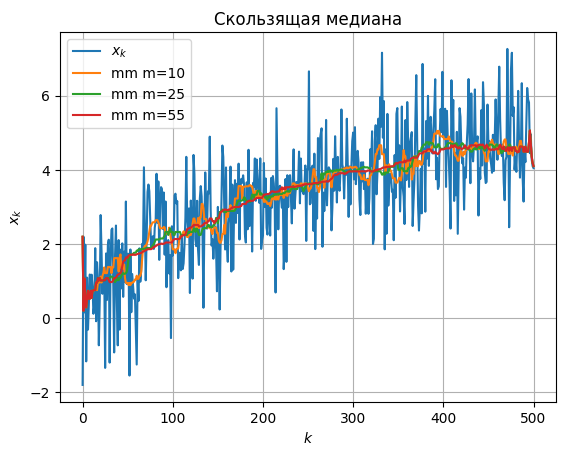

In [13]:
def mm_pd(data, window_size):
    import pandas as pd
    pd_data = pd.Series(data)
    return pd_data.rolling(window=window_size).median()
    # return np.convolve(data, np.ones(window_size), 'valid') / window_size

def mm(data, m):
    mm = [0] * len(data)
    mm[0] = np.median(np.array([data[0], data[1], 3*data[1] - 2*data[2]]))
    for i in range(1, k):
        w = m
        while (i - w < 0) or (i + w > len(data) - 1):
            w -= 1
        mm[i] = np.median(data[i-w:i+w])
    mm[-1] = np.median(np.array([data[-1], data[-2], 3*data[-2] - 2*data[3]]))
    return mm

mm_list = []
for m in [10, 25, 55]:
    mm_list.append(np.array(mm(x, m)))

for i in range(3):
    print((mm_list[i][:10]))



plt.plot(k_list, x, label='$x_k$')
for i, m in enumerate([10, 25, 55]):
    plt.plot(k_list, mm_list[i], label=f'mm m={m}')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$x_k$")
plt.title("Скользящая медиана")
plt.show()

### Сравниваем с трендом

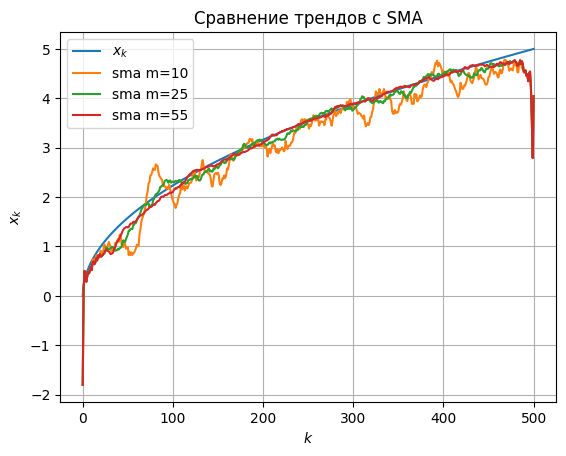

In [14]:
plt.plot(k_list, x_orig, label='$x_k$')
for i, m in enumerate([10, 25, 55]):
    plt.plot(k_list, sma_list[i], label=f'sma m={m}')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$x_k$")
plt.title("Сравнение трендов с SMA")
plt.show()

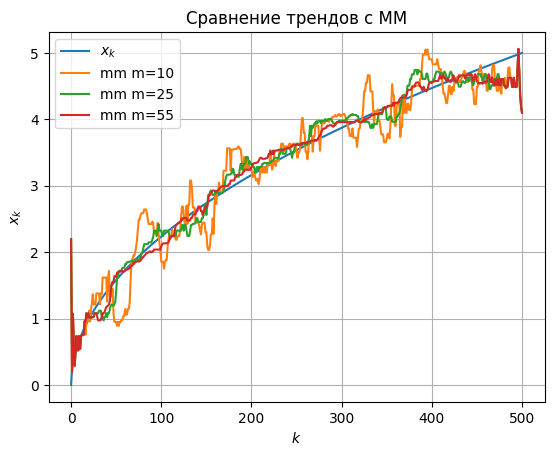

In [15]:
plt.plot(k_list, x_orig, label='$x_k$')
for i, m in enumerate([10, 25, 55]):
    plt.plot(k_list, mm_list[i], label=f'mm m={m}')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$x_k$")
plt.title("Сравнение трендов с MM")
plt.show()

### Оставляем только шум (SMA)

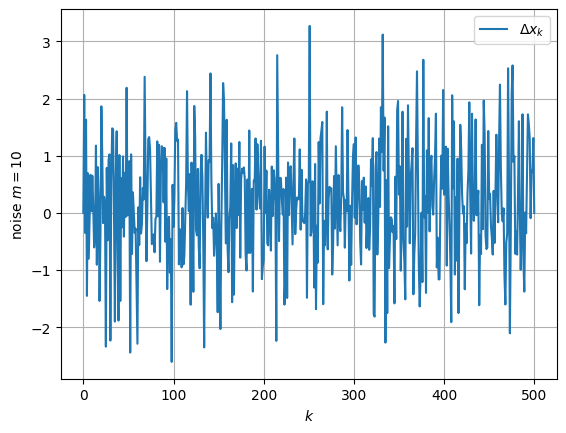

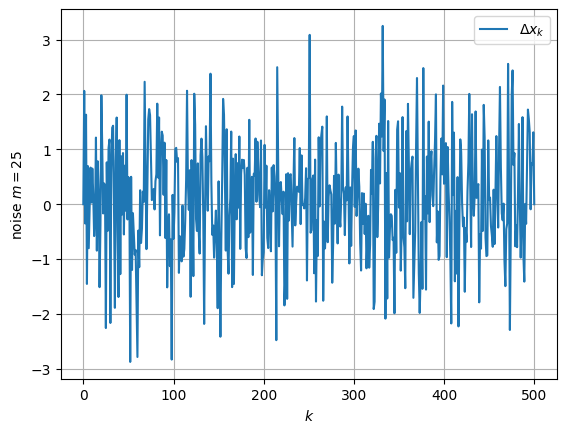

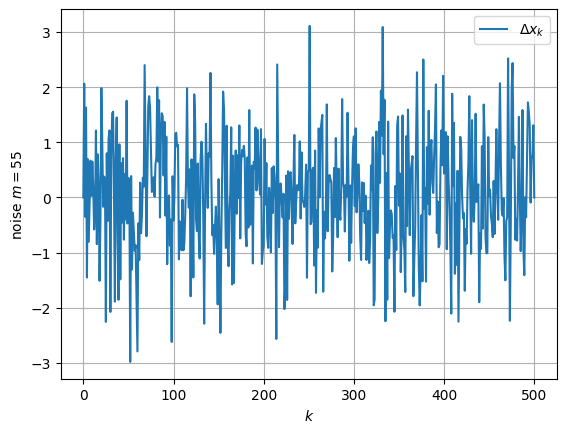

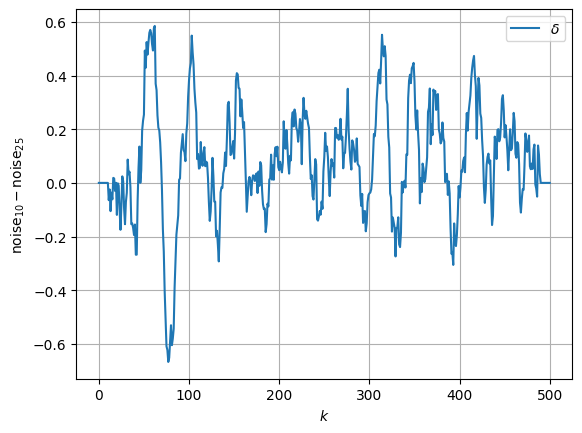

In [28]:
noise_sma = np.empty((len(sma_list), len(sma_list[0])))
for i in range(len(sma_list)):
    noise_sma[i] = x - sma_list[i]

plt.plot(k_list, noise_sma[0], label='$\\Delta x_k$')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$\\text{noise}\ m = 10$")
plt.title("")
plt.show()

plt.plot(k_list, noise_sma[1], label='$\\Delta x_k$')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$\\text{noise}\ m = 25$")
plt.title("")
plt.show()

plt.plot(k_list, noise_sma[2], label='$\\Delta x_k$')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$\\text{noise}\ m = 55$")
plt.title("")
plt.show()

plt.plot(k_list, noise_sma[0] - noise_sma[1], label='$\\delta$')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$\\text{noise}_{10} - \\text{noise}_{25}$")
plt.title("")
plt.show()

### Оставляем только шум (MM)

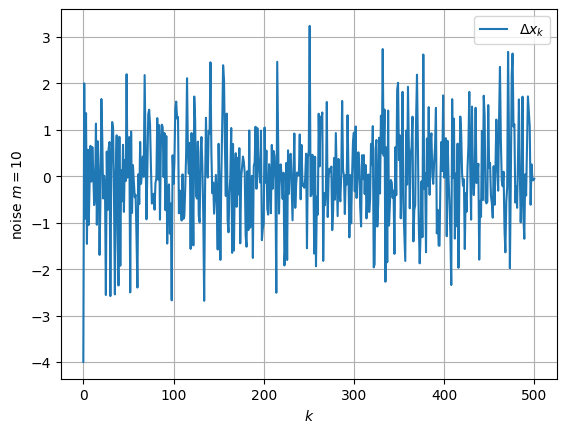

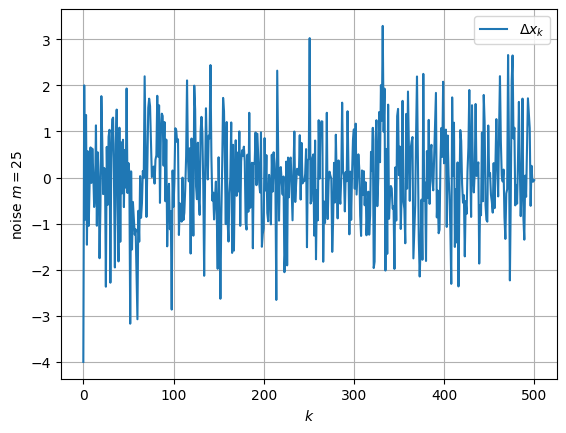

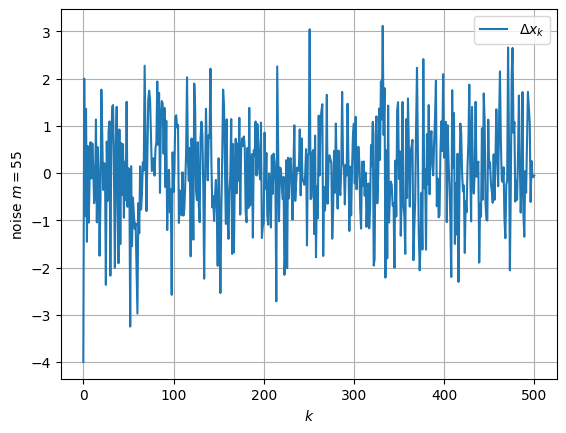

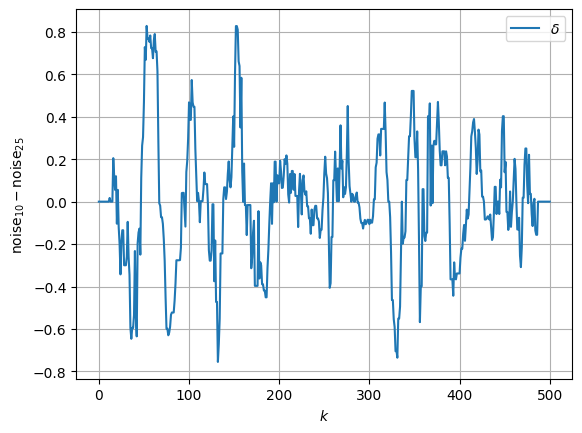

In [30]:
noise_mm = np.empty((len(mm_list), len(mm_list[0])))
for i in range(len(mm_list)):
    noise_mm[i] = x - mm_list[i]

plt.plot(k_list, noise_mm[0], label='$\\Delta x_k$')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$\\text{noise}\ m = 10$")
plt.title("")
plt.show()

plt.plot(k_list, noise_mm[1], label='$\\Delta x_k$')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$\\text{noise}\ m = 25$")
plt.title("")
plt.show()

plt.plot(k_list, noise_mm[2], label='$\\Delta x_k$')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$\\text{noise}\ m = 55$")
plt.title("")
plt.show()

plt.plot(k_list, noise_mm[0] - noise_mm[1], label='$\\delta$')
plt.grid()
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$\\text{noise}_{10} - \\text{noise}_{25}$")
plt.title("")
plt.show()

### Поворотные точки

In [75]:
def turning_points(data):
    p = 0
    for i in range(len(data) - 2):
        if data[i] < data[i+1] and data[i+1] > data[i+2]:
            p += 1
    # print(i, len(data))
    return p


# вычисляем поворотные точки для sma

E_pc = 2/3*(k-1)
D_pc = (16*(k+1)-29)/90
s_pc = np.sqrt(D_pc)

print("E_pc = ", E_pc)
print("D_pc = ", D_pc)
print("s_pc = ", s_pc)

print("\nКоличество поворотных точек для SMA:\n")

for i, noise in enumerate(noise_sma):
    p = turning_points(noise)
    print(f"p_{i} = {p}")
    if p > E_pc + s_pc:
        print("Ряд является быстро колеблющимся")
    elif p < E_pc - s_pc:
        print("Значения ряда положительно коррелированы")
    else:
        print("Ряд случаен")

print("\nКоличество поворотных точек для MM:\n")

for i, noise in enumerate(noise_mm):
    p = turning_points(noise)
    print(f"p_{i} = {p}")
    if p > E_pc + s_pc:
        print("Ряд является быстро колеблющимся")
    elif p < E_pc - s_pc:
        print("Значения ряда положительно коррелированы")
    else:
        print("Ряд случаен")

E_pc =  332.66666666666663
D_pc =  88.74444444444444
s_pc =  9.420426977820297

Количество поворотных точек для SMA:

p_0 = 168
Значения ряда положительно коррелированы
p_1 = 167
Значения ряда положительно коррелированы
p_2 = 167
Значения ряда положительно коррелированы

Количество поворотных точек для MM:

p_0 = 168
Значения ряда положительно коррелированы
p_1 = 167
Значения ряда положительно коррелированы
p_2 = 167
Значения ряда положительно коррелированы


In [66]:
def kendall_coefficient(data, n):
    p = 0
    for i in range(len(data) - 1):
        for j in range(i+1, len(data)):
            if data[j] > data[i]:
                p += 1
    # print(p)
    return 4*p/(n*(n-1)) - 1


E_t = 0
D_t = 2*(2*(k+1)+5)/(9*(k+1)*k)
s_t = np.sqrt(D_t)

print("E_t = ", E_t)
print("D_t = ", D_t)
print("s_t = ", s_t)

print("\nКоэффициенты Кендала для SMA:\n")


for i, noise in enumerate(noise_sma):
    t = kendall_coefficient(noise, k+1)
    print(f"t_{i} = {t}")
    if t > E_t + s_t:
        print("Возрастяющий тренд")
    elif t < E_t - s_t:
        print("Убывающий тренд")
    else:
        print("Ряд случаен")

print("\nКоэффициенты Кендала для MM:\n")

for i, noise in enumerate(noise_mm):
    t = kendall_coefficient(noise, k+1)
    print(f"t_{i} = {t}")
    if t > E_t + s_t:
        print("Возрастяющий тренд")
    elif t < E_t - s_t:
        print("Убывающий тренд")
    else:
        print("Ряд случаен")

E_t =  0
D_t =  0.0008933244621867376
s_t =  0.02988853395847206

Коэффициенты Кендала для SMA:

t_0 = 0.020231536926147653
Ряд случаен
t_1 = 0.015185628742514945
Ряд случаен
t_2 = 0.01908183632734528
Ряд случаен

Коэффициенты Кендала для MM:

t_0 = 0.020231536926147653
Ряд случаен
t_1 = 0.015185628742514945
Ряд случаен
t_2 = 0.01908183632734528
Ряд случаен
